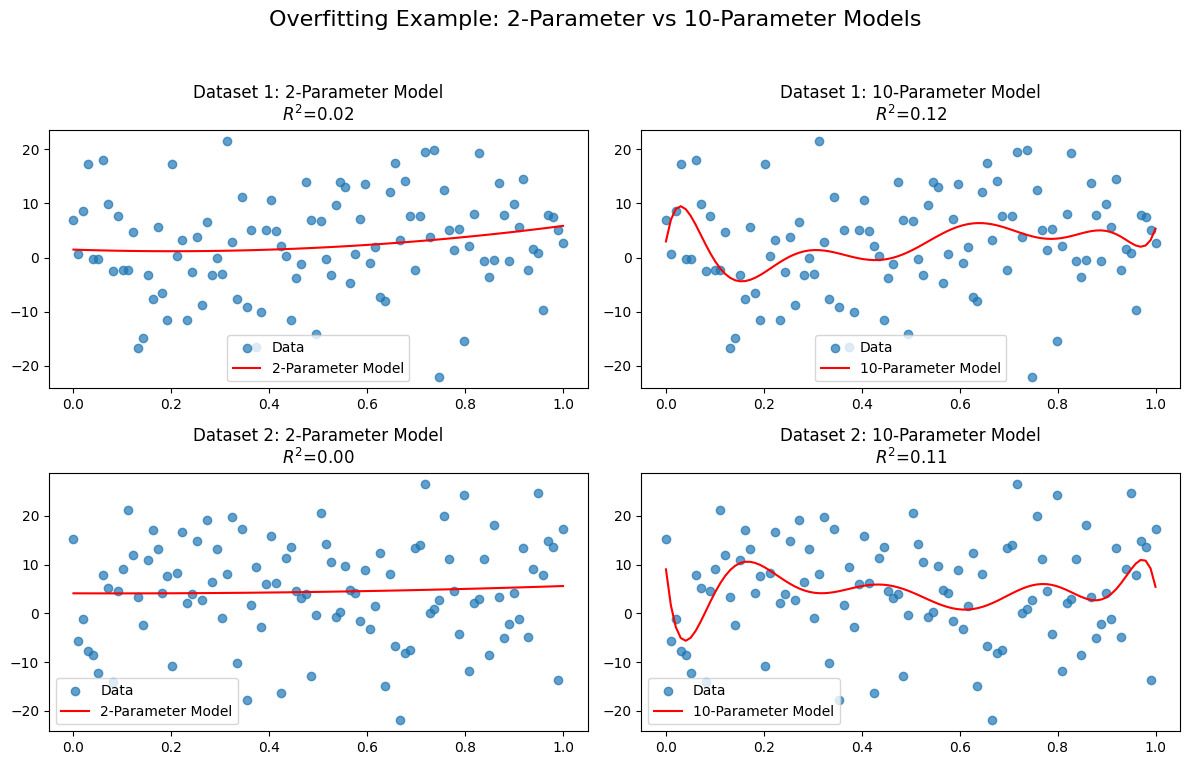

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Function to generate data
def generate_data(n_points=100, noise_level=10, seed=None):
    if seed:
        np.random.seed(seed)
    x = np.linspace(0, 1, n_points)
    y = 3 * x + 2  # Underlying trend line
    y_noisy = y + noise_level * np.random.randn(n_points)
    return x, y_noisy

# Function to fit polynomial model
def fit_model(x, y, degree):
    coeffs = np.polyfit(x, y, degree)
    model = np.poly1d(coeffs)
    y_pred = model(x)
    return y_pred, coeffs

# Generate datasets
x1, y1 = generate_data(n_points=100, noise_level=10, seed=42)
x2, y2 = generate_data(n_points=100, noise_level=10, seed=24)

# Fit models (2-parameter and 10-parameter)
y1_pred_2, _ = fit_model(x1, y1, 2)  # Dataset 1, 2-parameter model
y1_pred_10, _ = fit_model(x1, y1, 10)  # Dataset 1, 10-parameter model
y2_pred_2, _ = fit_model(x2, y2, 2)  # Dataset 2, 2-parameter model
y2_pred_10, _ = fit_model(x2, y2, 10)  # Dataset 2, 10-parameter model

# Compute R^2 values
r2_1_2 = r2_score(y1, y1_pred_2)
r2_1_10 = r2_score(y1, y1_pred_10)
r2_2_2 = r2_score(y2, y2_pred_2)
r2_2_10 = r2_score(y2, y2_pred_10)

# Plot results
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Overfitting Example: 2-Parameter vs 10-Parameter Models", fontsize=16)

# Dataset 1
axs[0, 0].scatter(x1, y1, alpha=0.7, label="Data")
axs[0, 0].plot(x1, y1_pred_2, color="r", label="2-Parameter Model")
axs[0, 0].set_title(f"Dataset 1: 2-Parameter Model\n$R^2$={r2_1_2:.2f}")
axs[0, 0].legend()

axs[0, 1].scatter(x1, y1, alpha=0.7, label="Data")
axs[0, 1].plot(x1, y1_pred_10, color="r", label="10-Parameter Model")
axs[0, 1].set_title(f"Dataset 1: 10-Parameter Model\n$R^2$={r2_1_10:.2f}")
axs[0, 1].legend()

# Dataset 2
axs[1, 0].scatter(x2, y2, alpha=0.7, label="Data")
axs[1, 0].plot(x2, y2_pred_2, color="r", label="2-Parameter Model")
axs[1, 0].set_title(f"Dataset 2: 2-Parameter Model\n$R^2$={r2_2_2:.2f}")
axs[1, 0].legend()

axs[1, 1].scatter(x2, y2, alpha=0.7, label="Data")
axs[1, 1].plot(x2, y2_pred_10, color="r", label="10-Parameter Model")
axs[1, 1].set_title(f"Dataset 2: 10-Parameter Model\n$R^2$={r2_2_10:.2f}")
axs[1, 1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
